In [1]:
import numpy as np
from eryn.backends import HDFBackend as eryn_HDF_Backend
import matplotlib.pyplot as plt
import corner
import os
import warnings
import matplotlib.lines as mlines

In [2]:
run_direc = '/work/scratch/data/burkeol/kerr_few_paper/few_inj_AAK_recover/'

In [3]:
# Now analyse the results using 9PN for circular orbits

reader_kerr_inj_kerr_rec = eryn_HDF_Backend(run_direc + 'cluster_kerr_inj_kerr_recov_M_1e6_mu_10_a_0p9_e0_0p3_p0_8p55_e0_0p3_dist_1_SNR_164.h5',read_only = True)

N_iterations = reader_kerr_inj_kerr_rec.get_chain()['model_0'].shape[0]
N_temps = reader_kerr_inj_kerr_rec.get_chain()['model_0'].shape[1]
N_walkers = reader_kerr_inj_kerr_rec.get_chain()['model_0'].shape[2]
N_params = reader_kerr_inj_kerr_rec.get_chain()['model_0'].shape[-1]

samples_kerr_inj_kerr_rec = [reader_kerr_inj_kerr_rec.get_chain(discard = 500)['model_0'][:,i].reshape(-1,N_params) 
                    for i in range(N_temps)]  # Take true chain]


log_like_kerr_inj_kerr_rec = reader_kerr_inj_kerr_rec.get_log_like(discard = 500)

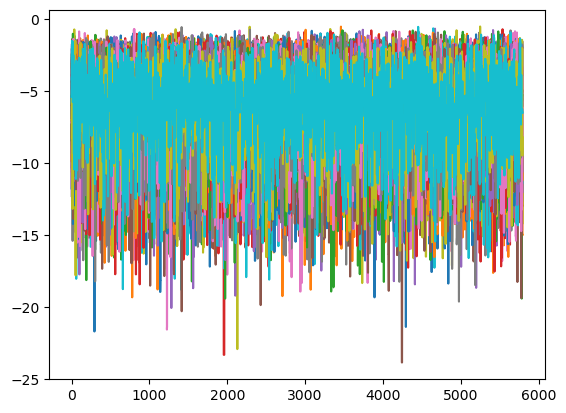

In [4]:
plt.plot(log_like_kerr_inj_kerr_rec[:,0,:]);plt.show()

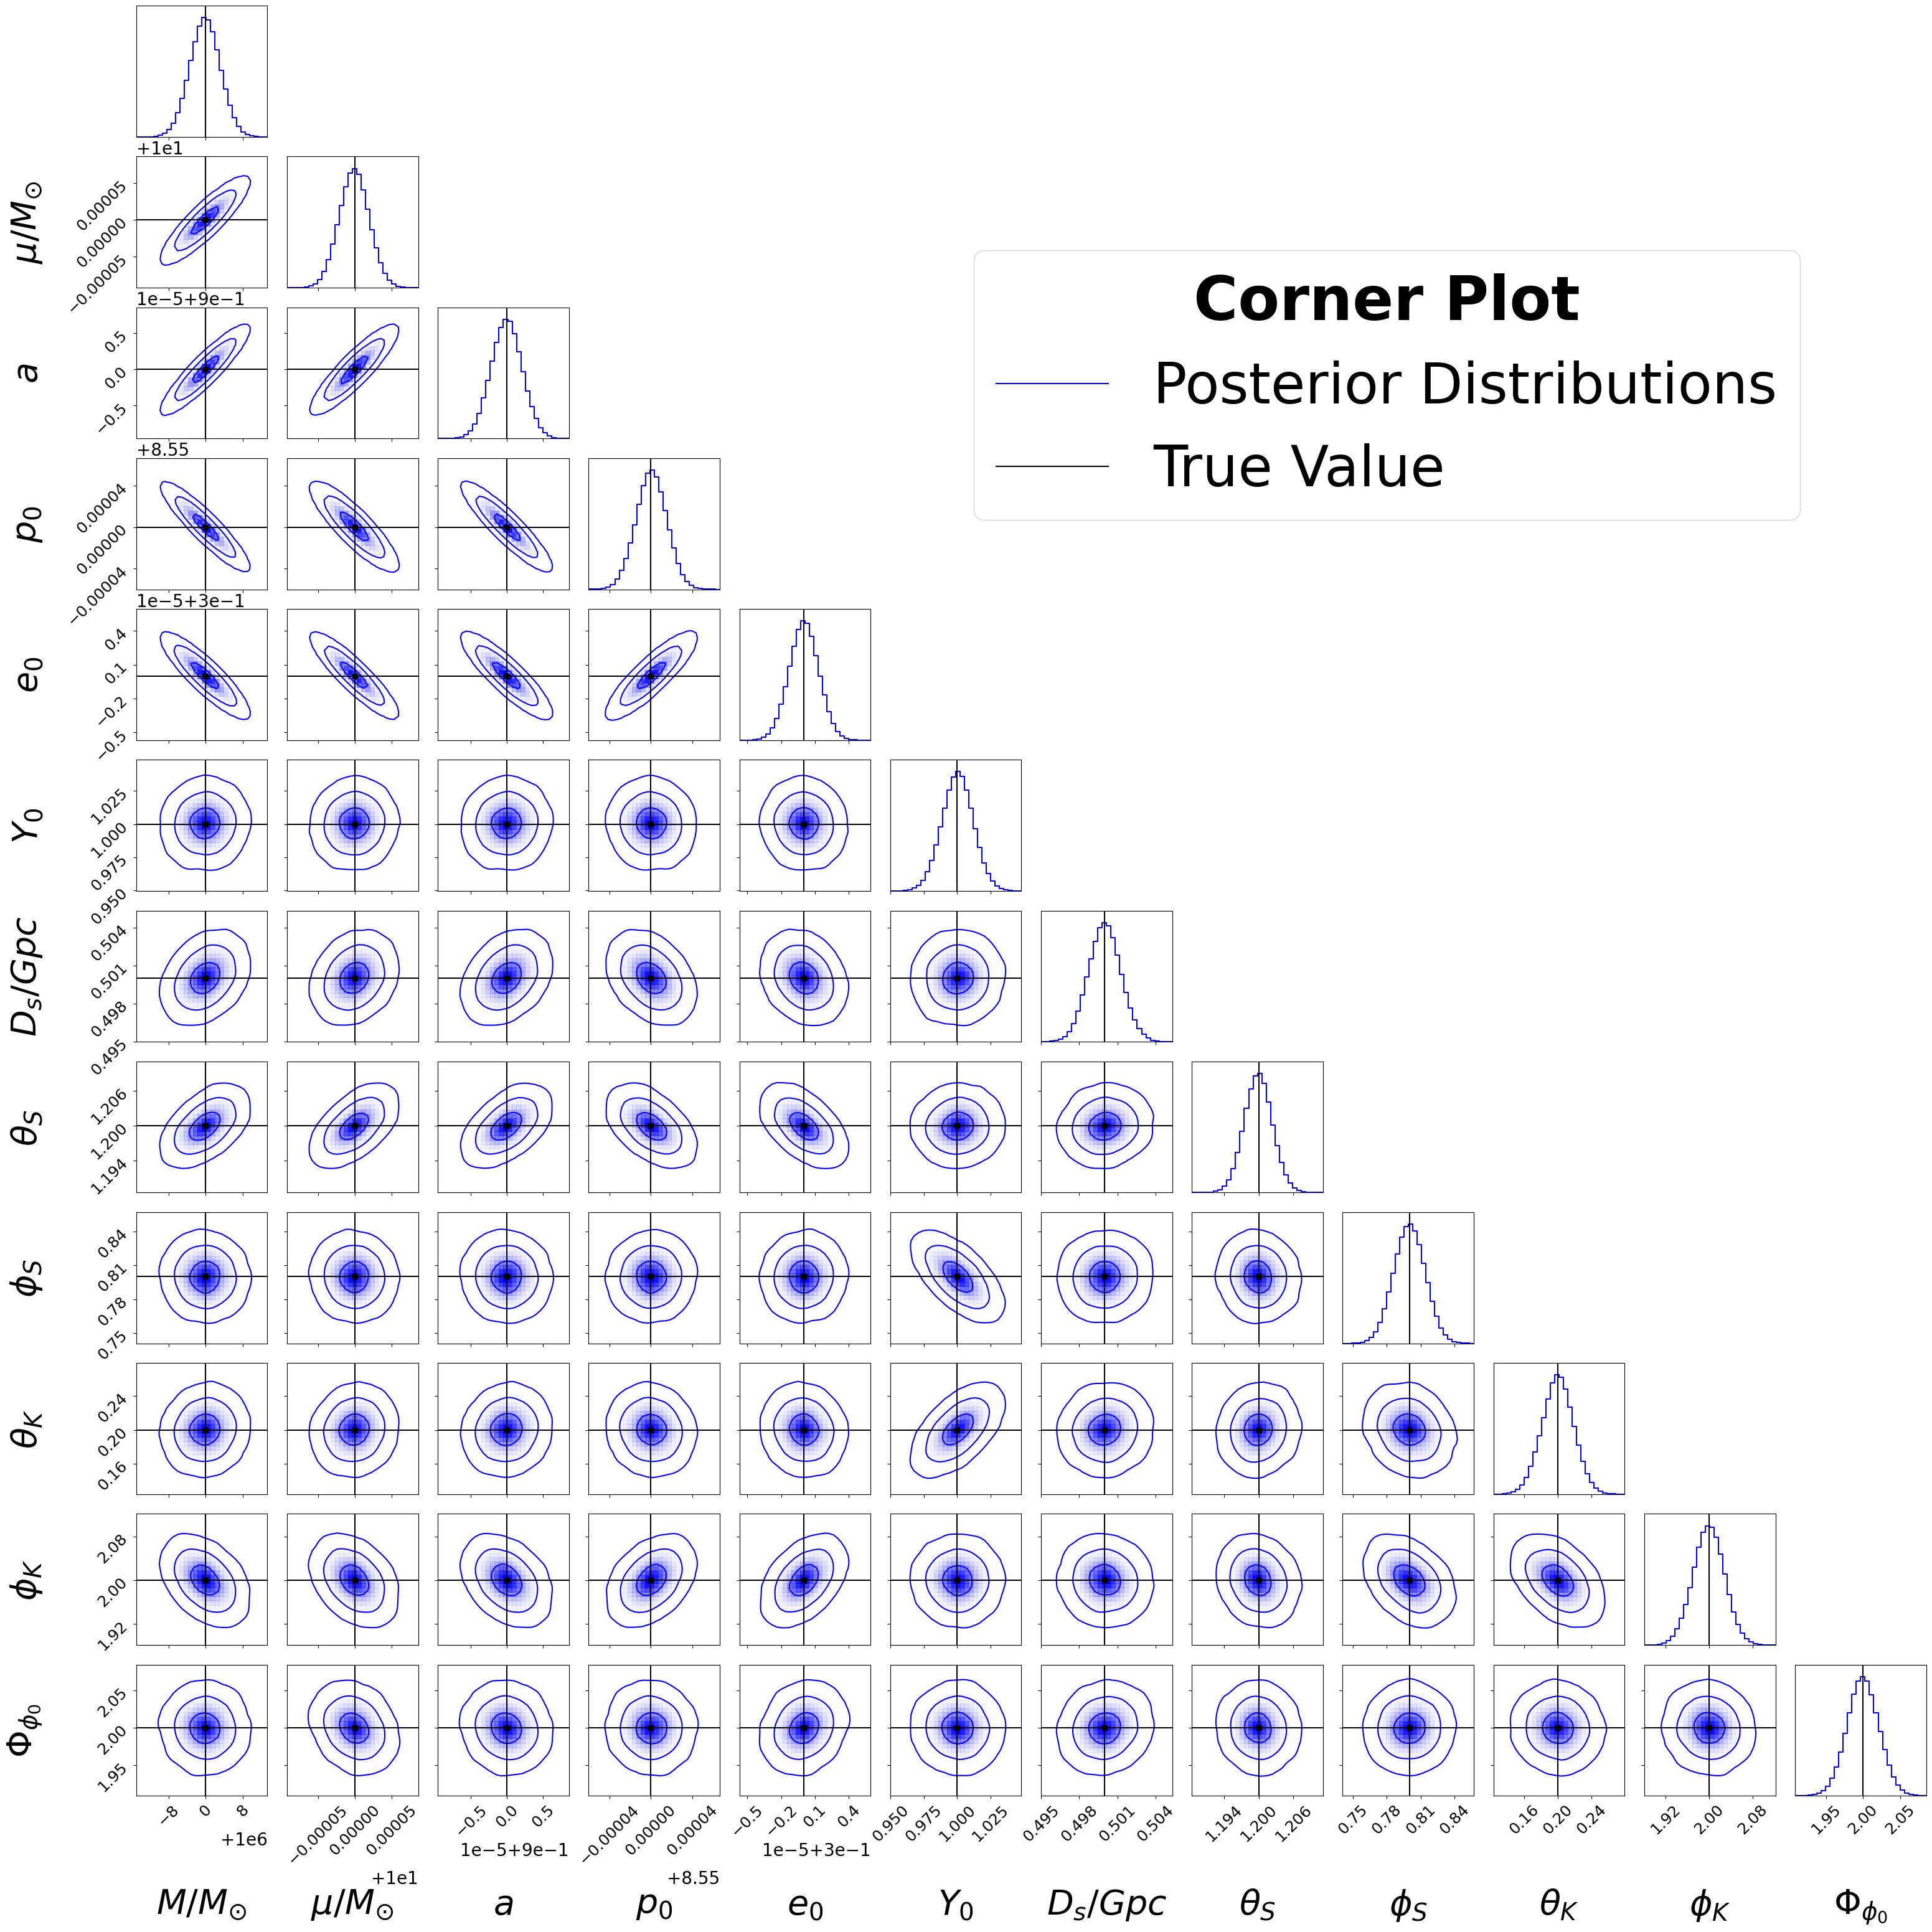

In [5]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

# Now check the corner plot, check all are gaussian.

params_corner =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$", r"$Y_{0}$", r"$D_{s}/Gpc$", 
                     r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
                     r"$\Phi_{\phi_{0}}$", r"$\Phi_{\theta_{0}}$", r"$\Phi_{r_{0}}$"] 

true_vals = np.array([1e6,10, 0.9, 8.55, 0.3, 1.0, 0.5, 1.2, 0.8, 0.2, 2.0, 2.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_corner, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)


samples_corner = np.column_stack(samples_kerr_inj_kerr_rec)

figure = corner.corner(samples_corner,bins = 30, color = 'blue', **corner_kwargs)

axes = np.array(figure.axes).reshape((N_params, N_params))

for i in range(N_params):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="k")
    
for yi in range(N_params):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="k")
        ax.axvline(true_vals[xi],color= "k")
        ax.plot(true_vals[xi], true_vals[yi], "sk")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=18)
  
blue_line = mlines.Line2D([], [], color='blue', label=r'Posterior Distributions')
black_line = mlines.Line2D([], [], color='black', label='True Value')

plt.legend(handles=[blue_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = r"Corner Plot", title_fontproperties = FontProperties(size = 70, weight = 'bold'))
plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)

In [33]:
# Now analyse the results using 9PN for circular orbits

reader_kerr_inj_AAK_rec = eryn_HDF_Backend(run_direc + 'cluster_kerr_inj_AAK_recov_M_1e6_mu_10_a_0p9_e0_0p3_p0_8p55_e0_0p3_dist_1_SNR_164.h5',read_only = True)

N_iterations = reader_kerr_inj_AAK_rec.get_chain()['model_0'].shape[0]
N_temps = reader_kerr_inj_AAK_rec.get_chain()['model_0'].shape[1]
N_walkers = reader_kerr_inj_AAK_rec.get_chain()['model_0'].shape[2]
N_params = reader_kerr_inj_AAK_rec.get_chain()['model_0'].shape[-1]

samples_kerr_inj_AAK_rec = [reader_kerr_inj_AAK_rec.get_chain(discard = 1000)['model_0'][:,i].reshape(-1,N_params) 
                    for i in range(N_temps)]  # Take true chain]


log_like_kerr_inj_AAK_rec = reader_kerr_inj_AAK_rec.get_log_like(discard = 1000)

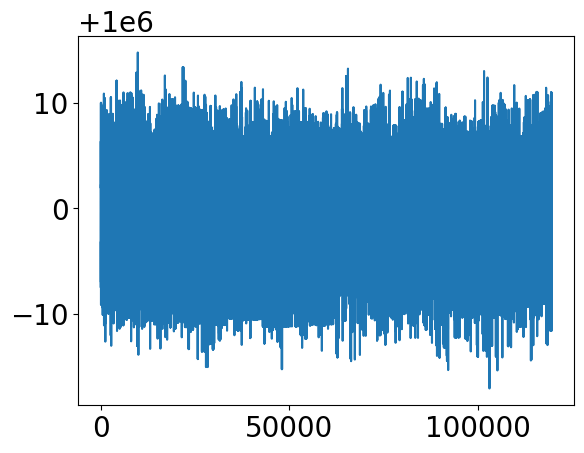

In [34]:
plt.plot(samples_kerr_inj_AAK_rec[0][:,0]);plt.show()

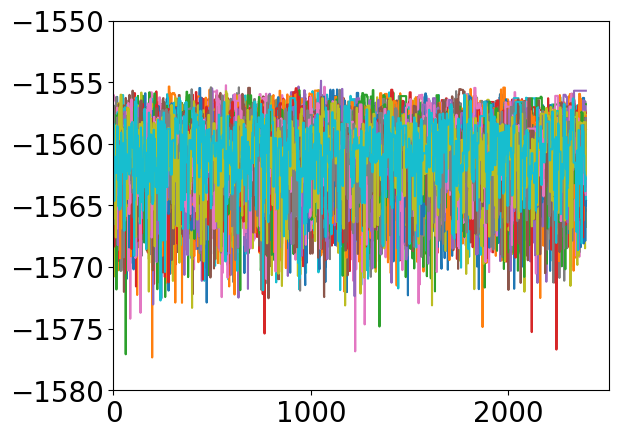

In [35]:
plt.plot(log_like_kerr_inj_AAK_rec[:,0,:]);plt.xlim([0,None]); plt.ylim([-1580,-1550]);plt.show()

(array([7.0000e+00, 1.9000e+01, 6.8000e+01, 1.6300e+02, 4.2400e+02,
        7.0000e+02, 1.3300e+03, 2.5790e+03, 3.7010e+03, 5.9860e+03,
        8.6860e+03, 1.0703e+04, 1.2194e+04, 1.3450e+04, 1.4416e+04,
        1.2325e+04, 1.0021e+04, 7.4450e+03, 5.7860e+03, 3.9530e+03,
        2.6190e+03, 1.4330e+03, 6.5300e+02, 4.4200e+02, 3.2000e+02,
        1.6700e+02, 4.2000e+01, 1.3000e+01, 4.0000e+00, 1.0000e+00]),
 array([0.29999463, 0.29999505, 0.29999548, 0.29999591, 0.29999633,
        0.29999676, 0.29999718, 0.29999761, 0.29999803, 0.29999846,
        0.29999888, 0.29999931, 0.29999973, 0.30000016, 0.30000059,
        0.30000101, 0.30000144, 0.30000186, 0.30000229, 0.30000271,
        0.30000314, 0.30000356, 0.30000399, 0.30000441, 0.30000484,
        0.30000527, 0.30000569, 0.30000612, 0.30000654, 0.30000697,
        0.30000739]),
 <BarContainer object of 30 artists>)

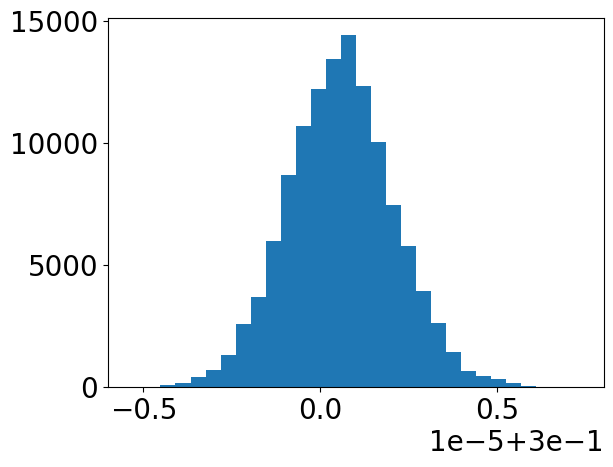

In [36]:
plt.hist(samples_kerr_inj_AAK_rec[0][:,4],bins = 30)

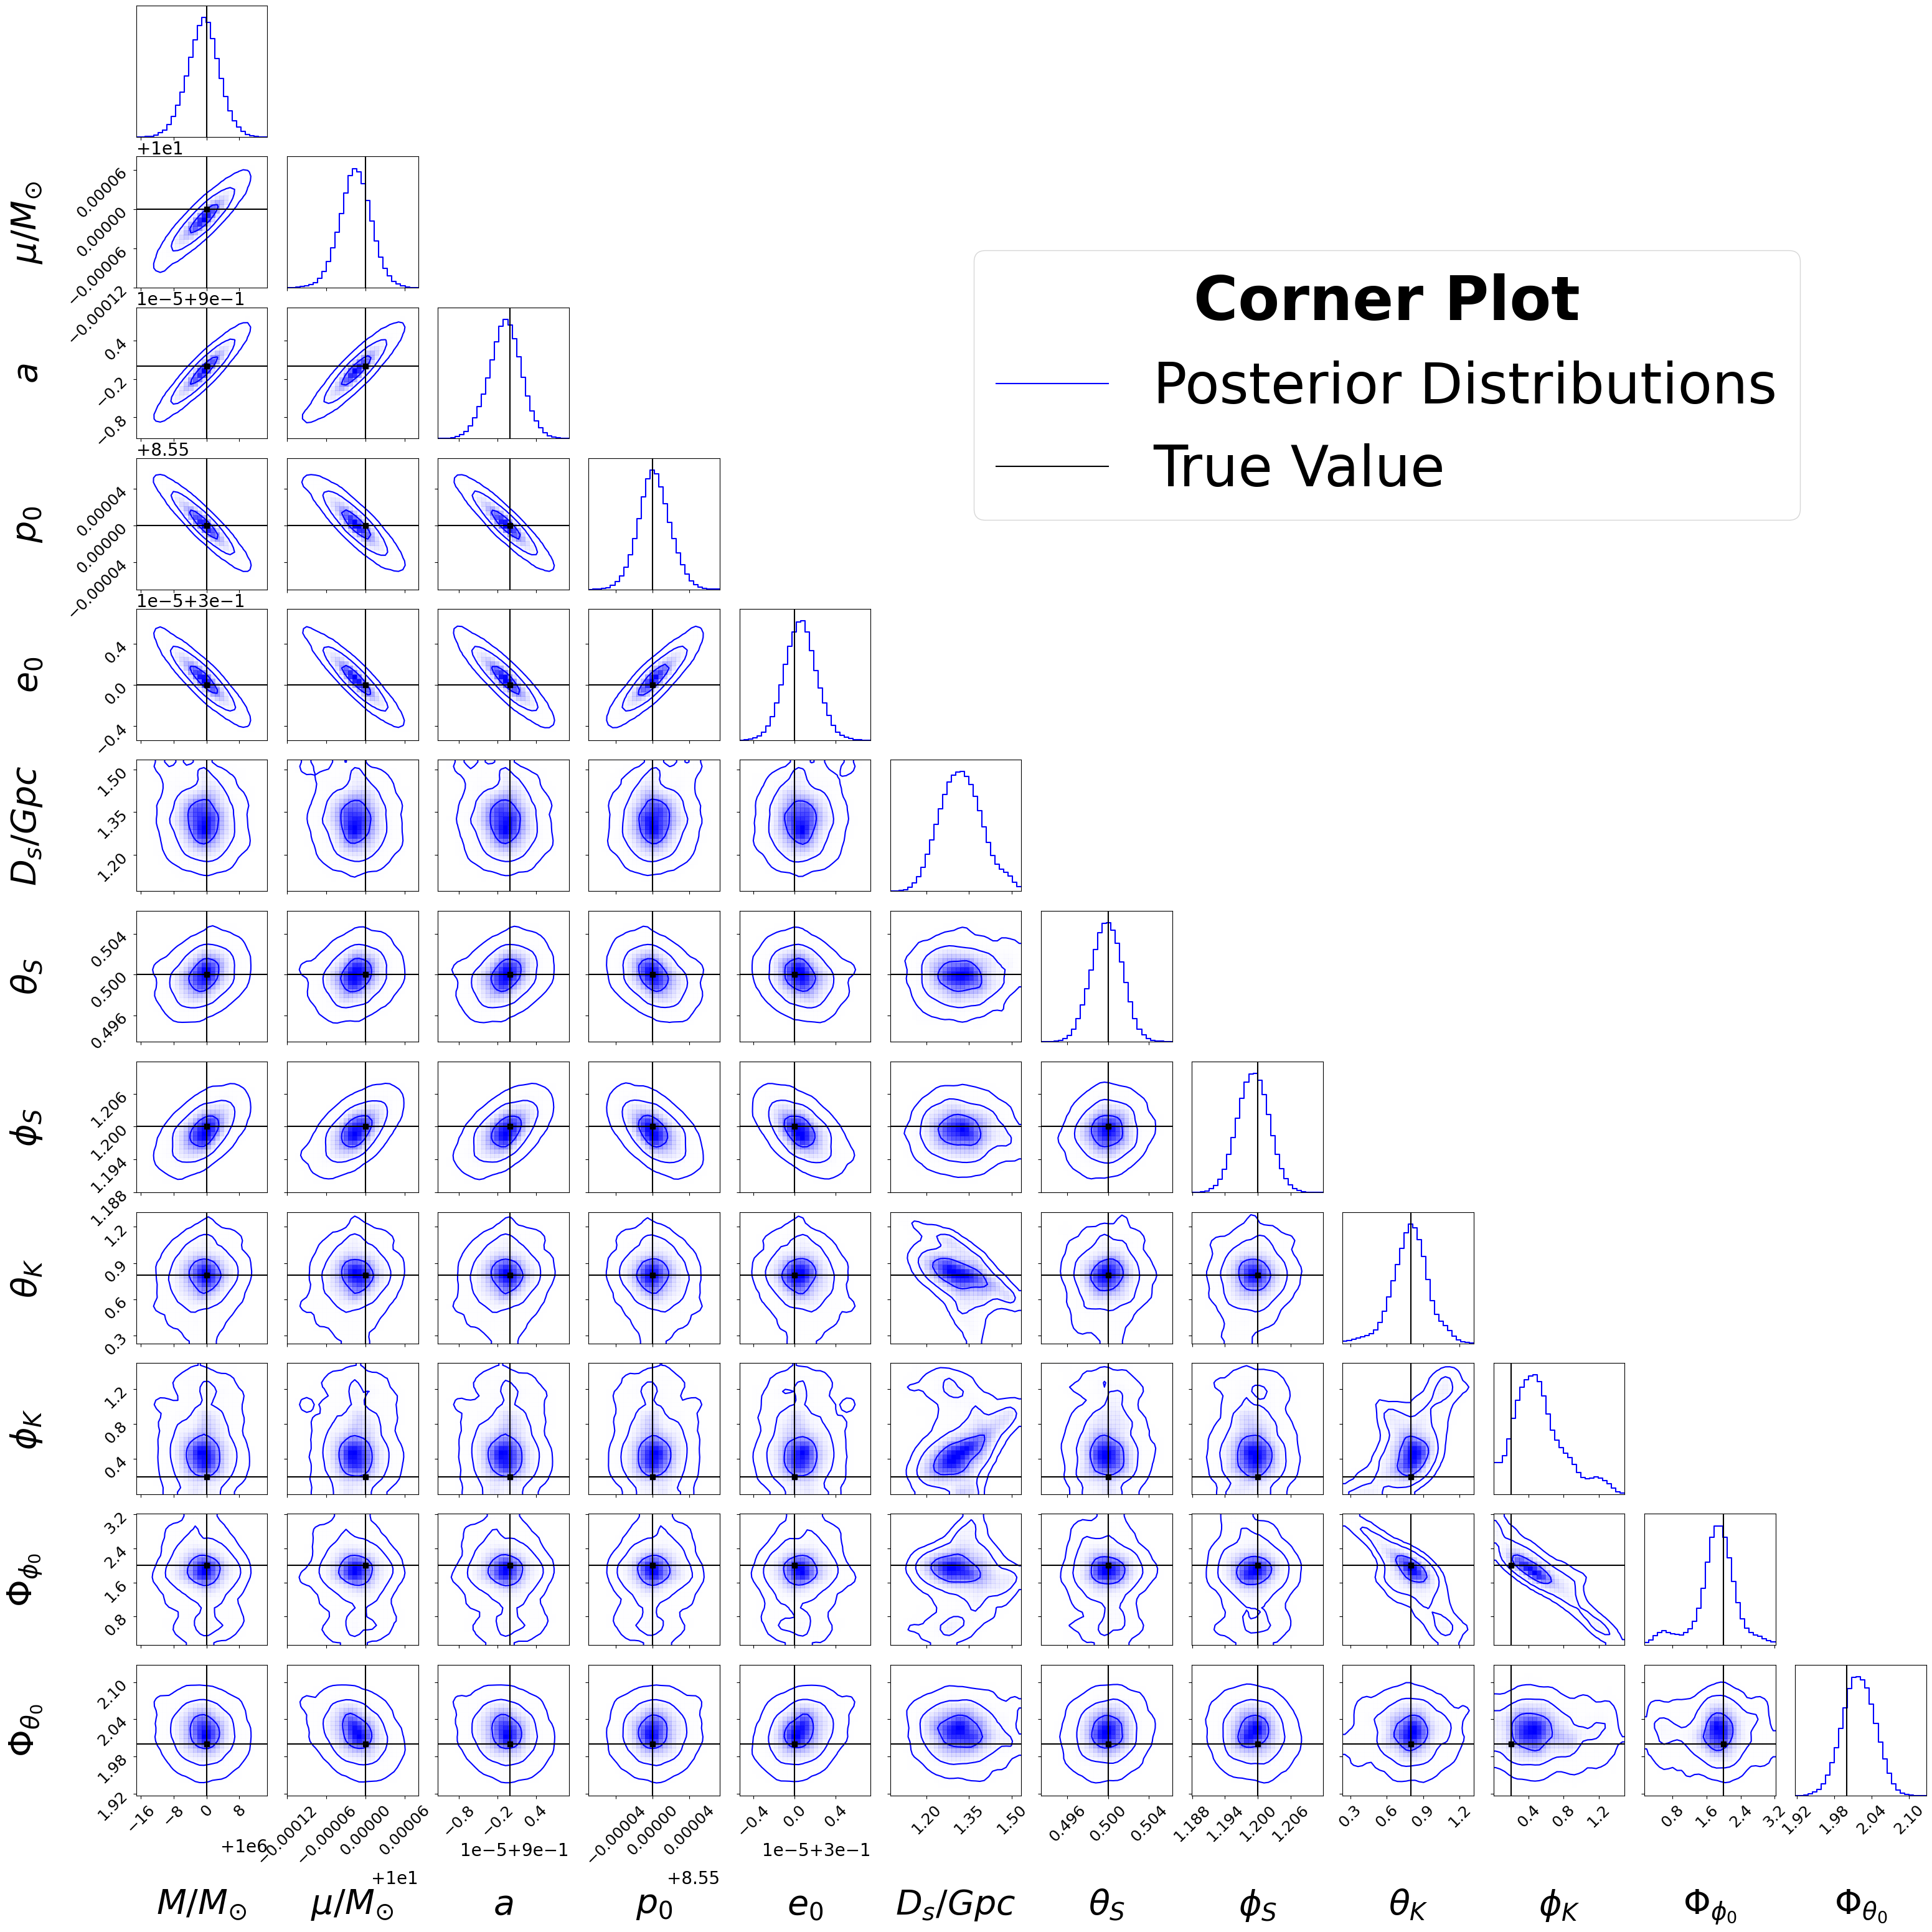

In [37]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.size'] = 20

# Now check the corner plot, check all are gaussian.

params_corner =[r"$M/M_{\odot}$", r"$\mu/M_{\odot}$", r"$a$", 
                     r"$p_{0}$", r"$e_{0}$", r"$D_{s}/Gpc$", 
                     r"$\theta_{S}$", r"$\phi_{S}$", r"$\theta_{K}$", r"$\phi_{K}$", 
                     r"$\Phi_{\phi_{0}}$", r"$\Phi_{\theta_{0}}$", r"$\Phi_{r_{0}}$"] 

true_vals = np.array([1e6,10, 0.9, 8.55, 0.3, 1.0, 0.5, 1.2, 0.8, 0.2, 2.0, 2.0])

corner_kwargs = dict(plot_datapoints=False,smooth1d=True,
                       labels=params_corner, levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), 
                       label_kwargs=dict(fontsize=40), max_n_ticks=4,
                       show_titles=False, smooth = True, labelpad = 0.4)


samples_kerr_inj_AAK_rec_corner_plot = np.column_stack(samples_kerr_inj_AAK_rec)

figure = corner.corner(samples_kerr_inj_AAK_rec[0],bins = 30, color = 'blue', **corner_kwargs)

axes = np.array(figure.axes).reshape((N_params, N_params))

for i in range(N_params):
    ax = axes[i, i]
    ax.axvline(true_vals[i], color="k")
    
for yi in range(N_params):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axhline(true_vals[yi], color="k")
        ax.axvline(true_vals[xi],color= "k")
        ax.plot(true_vals[xi], true_vals[yi], "sk")
        
for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=18)
  
blue_line = mlines.Line2D([], [], color='blue', label=r'Posterior Distributions')
black_line = mlines.Line2D([], [], color='black', label='True Value')

plt.legend(handles=[blue_line,black_line], fontsize = 65, frameon = True, bbox_to_anchor=(0.25, N_params), loc="upper right", title = r"Corner Plot", title_fontproperties = FontProperties(size = 70, weight = 'bold'))
plt.subplots_adjust(left=-0.1, bottom=-0.1, right=None, top=None, wspace=0.15, hspace=0.15)

In [3]:
data_direc = "/home/ad/burkeol/work/Current_Projects/FastEMRIWaveforms_backwards/KerrEquatorialCodes/Test_AAK_Kerr/SNR/data_files/SNR_comparisons_same_traj"
os.chdir(data_direc)

In [4]:
ls

diff_amps_diff_traj_M_1e6_mu_1e1.csv
diff_amps_same_traj_high_spin_M_1e6_mu_1e1.csv
diff_amps_same_traj_KerrEccEq_M_1e6_mu_1e1.csv
diff_amps_same_traj_M_1e6_mu_1_all_modes.csv
diff_amps_same_traj_M_1e7_mu_100.csv
diff_amps_same_traj_M_1e7_mu_10.csv
plots/
same_kerr_amps_diff_traj_M_1e6_mu_1e1.csv


In [5]:
import pandas as pd

df = pd.read_csv("diff_amps_same_traj_KerrEccEq_M_1e6_mu_1e1.csv")

df_high_spin = pd.read_csv("diff_amps_same_traj_high_spin_M_1e6_mu_1e1.csv")
df_diff_amps_same_traj_full = df.append(df_high_spin, ignore_index=True)

df_all_modes = pd.read_csv("diff_amps_same_traj_M_1e6_mu_1_all_modes.csv")

In [6]:
df_a_0 = df[df['a'] == 0.0]
df_a_0p1 = df[df['a'] == 0.1]
df_a_0p2 = df[df['a'] == 0.2]
df_a_0p3 = df[df['a'] == 0.3]
df_a_0p4 = df[df['a'] == 0.4]
df_a_0p5 = df[df['a'] == 0.5]
df_a_0p6 = df[df['a'] == 0.6000000000000001]
df_a_0p7 = df[df['a'] == 0.7000000000000001]
df_a_0p8 = df[df['a'] == 0.8]
df_a_0p9 = df_diff_amps_same_traj_full[df_diff_amps_same_traj_full['a'] == 0.9]
df_a_0p99 = df_diff_amps_same_traj_full[df_diff_amps_same_traj_full['a'] == 0.99]

In [7]:
df['a'][1000]

0.7000000000000001

In [12]:
df_all_modes_a_0p0 = df_all_modes[df_all_modes['a'] == 0.0]
df_all_modes_a_0p1 = df_all_modes[df_all_modes['a'] == 0.1]
df_all_modes_a_0p2 = df_all_modes[df_all_modes['a'] == 0.2]
df_all_modes_a_0p3 = df_all_modes[df_all_modes['a'] == 0.3]
df_all_modes_a_0p4 = df_all_modes[df_all_modes['a'] == 0.4]
df_all_modes_a_0p5 = df_all_modes[df_all_modes['a'] == 0.5]
df_all_modes_a_0p6 = df_all_modes[df_all_modes['a'] == 0.6000000000000001]
df_all_modes_a_0p7 = df_all_modes[df_all_modes['a'] == 0.7000000000000001]
df_all_modes_a_0p8 = df_all_modes[df_all_modes['a'] == 0.8]
df_all_modes_a_0p9 = df_all_modes[df_all_modes['a'] == 0.9000000000000001]
df_all_modes_a_0p99 = df_all_modes[df_all_modes['a'] == 0.99]

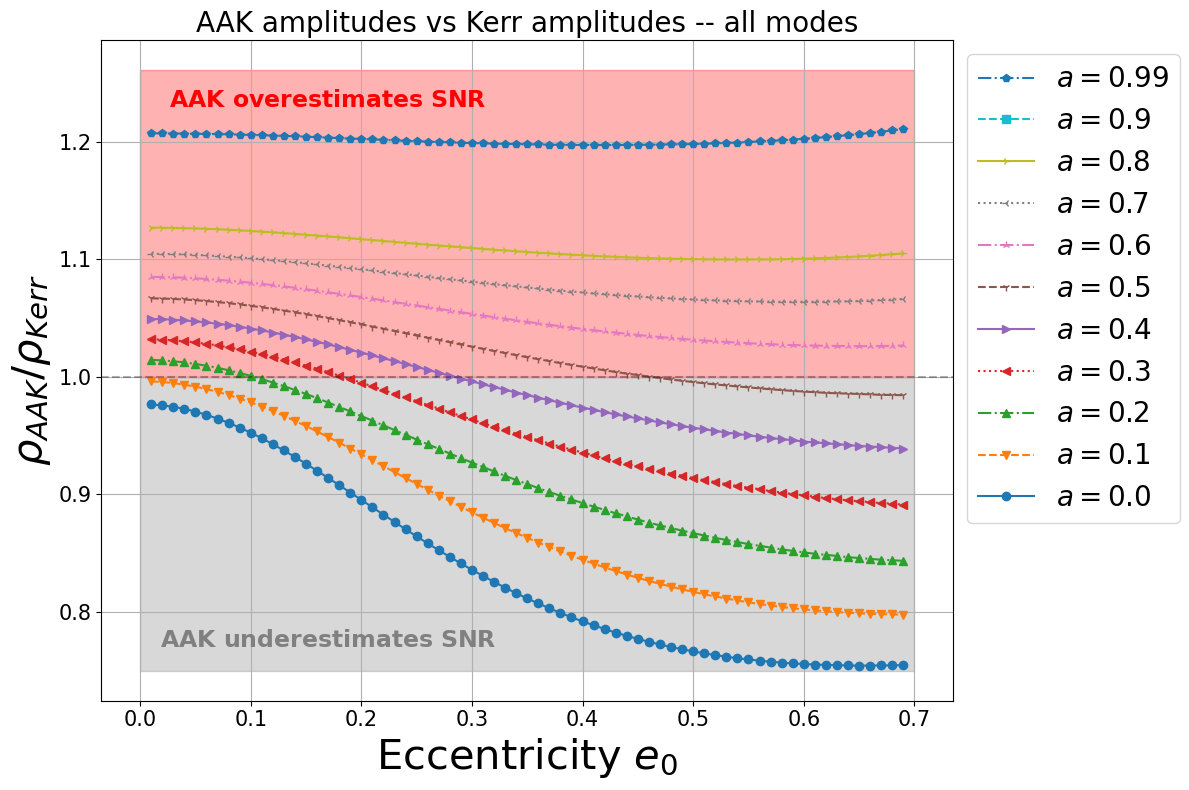

In [13]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each dataset with a unique linestyle and marker
plt.fill_between(np.linspace(0, 0.7, 500), 0.75, 1, color='grey', alpha=0.3)
plt.fill_between(np.linspace(0, 0.7, 500), 1, np.max(df_a_0p99['SNR_ratio'])+0.05, color='red', alpha=0.3)


plt.plot(df_all_modes_a_0p0['e'], df_all_modes_a_0p0['SNR_ratio'], label=r'$a = 0.0$', linestyle='-', marker='o')
plt.plot(df_all_modes_a_0p1['e'], df_all_modes_a_0p1['SNR_ratio'], label=r'$a = 0.1$', linestyle='--', marker='v')
plt.plot(df_all_modes_a_0p2['e'], df_all_modes_a_0p2['SNR_ratio'], label=r'$a = 0.2$', linestyle='-.', marker='^')
plt.plot(df_all_modes_a_0p3['e'], df_all_modes_a_0p3['SNR_ratio'], label=r'$a = 0.3$', linestyle=':', marker='<')
plt.plot(df_all_modes_a_0p4['e'], df_all_modes_a_0p4['SNR_ratio'], label=r'$a = 0.4$', linestyle='-', marker='>')
plt.plot(df_all_modes_a_0p5['e'], df_all_modes_a_0p5['SNR_ratio'], label=r'$a = 0.5$', linestyle='--', marker='1')
plt.plot(df_all_modes_a_0p6['e'], df_all_modes_a_0p6['SNR_ratio'], label=r'$a = 0.6$', linestyle='-.', marker='2')
plt.plot(df_all_modes_a_0p7['e'], df_all_modes_a_0p7['SNR_ratio'], label=r'$a = 0.7$', linestyle=':', marker='3')
plt.plot(df_all_modes_a_0p8['e'], df_all_modes_a_0p8['SNR_ratio'], label=r'$a = 0.8$', linestyle='-', marker='4')
plt.plot(df_all_modes_a_0p9['e'], df_all_modes_a_0p9['SNR_ratio'], label=r'$a = 0.9$', linestyle='--', marker='s')
plt.plot(df_all_modes_a_0p99['e'], df_all_modes_a_0p99['SNR_ratio'], label=r'$a = 0.99$', linestyle='-.', marker='p')

# Adding a horizontal line at y = 1.0
plt.axhline(y=1.0, color='black', linestyle='dashed', alpha=0.3)

# Adding text to shaded regions
# plt.text(0.15, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
# plt.text(0.15, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

plt.text(0.17, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
plt.text(0.17, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

# Labels and Title
plt.xlabel(r'Eccentricity $e_{0}$', fontsize=30)
plt.ylabel(r'$\rho_{AAK} / \rho_{Kerr}$', fontsize=30)
plt.title(r'AAK amplitudes vs Kerr amplitudes -- all modes', fontsize=20)

# Tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Grid
plt.grid(True)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))


# Layout adjustment
plt.tight_layout()
# plt.savefig("../../../PE/Plots/Kerr_AAK_amplitude_comparison_SNR_M_1e6_mu_1e1.pdf", bbox_inches="tight")
plt.show()



In [40]:
df_a_0p6

NameError: name 'df_a_0p6' is not defined

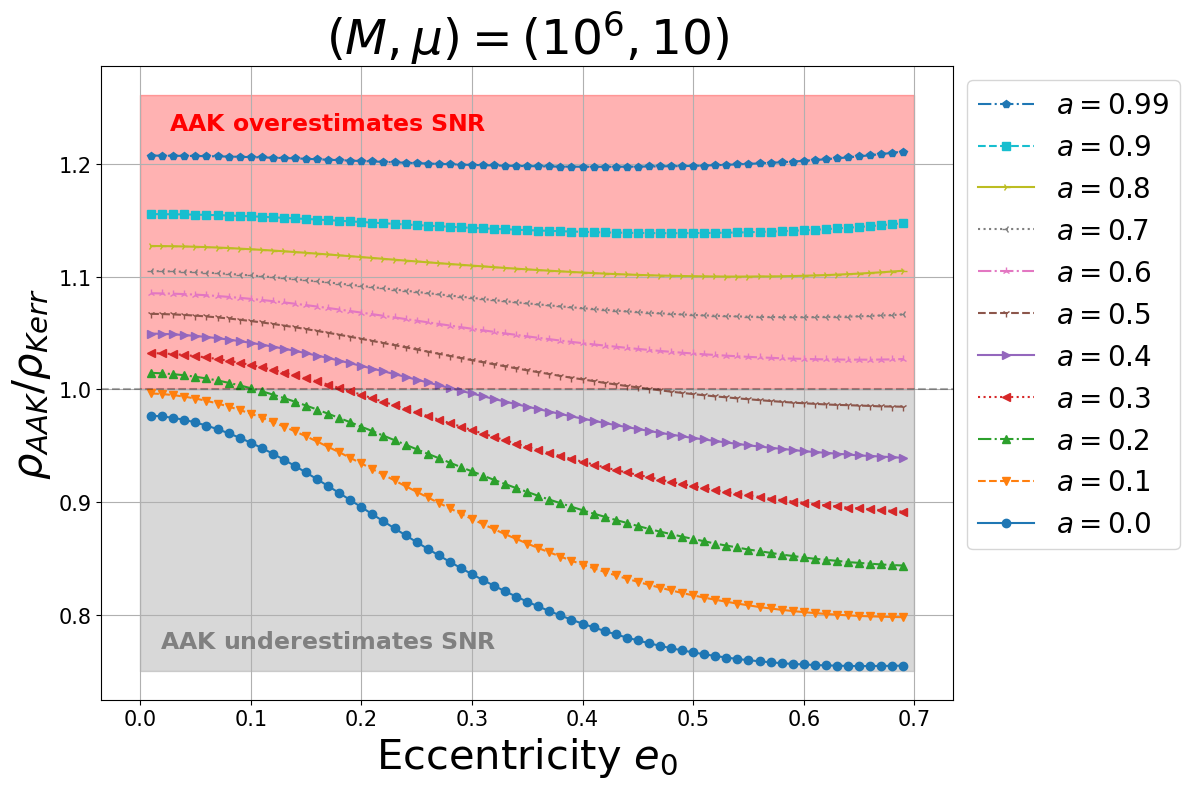

In [14]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each dataset with a unique linestyle and marker
plt.fill_between(np.linspace(0, 0.7, 500), 0.75, 1, color='grey', alpha=0.3)
plt.fill_between(np.linspace(0, 0.7, 500), 1, np.max(df_a_0p99['SNR_ratio'])+0.05, color='red', alpha=0.3)


plt.plot(df_a_0['e'], df_a_0['SNR_ratio'], label=r'$a = 0.0$', linestyle='-', marker='o')
plt.plot(df_a_0p1['e'], df_a_0p1['SNR_ratio'], label=r'$a = 0.1$', linestyle='--', marker='v')
plt.plot(df_a_0p2['e'], df_a_0p2['SNR_ratio'], label=r'$a = 0.2$', linestyle='-.', marker='^')
plt.plot(df_a_0p3['e'], df_a_0p3['SNR_ratio'], label=r'$a = 0.3$', linestyle=':', marker='<')
plt.plot(df_a_0p4['e'], df_a_0p4['SNR_ratio'], label=r'$a = 0.4$', linestyle='-', marker='>')
plt.plot(df_a_0p5['e'], df_a_0p5['SNR_ratio'], label=r'$a = 0.5$', linestyle='--', marker='1')
plt.plot(df_a_0p6['e'], df_a_0p6['SNR_ratio'], label=r'$a = 0.6$', linestyle='-.', marker='2')
plt.plot(df_a_0p7['e'], df_a_0p7['SNR_ratio'], label=r'$a = 0.7$', linestyle=':', marker='3')
plt.plot(df_a_0p8['e'], df_a_0p8['SNR_ratio'], label=r'$a = 0.8$', linestyle='-', marker='4')
plt.plot(df_a_0p9['e'], df_a_0p9['SNR_ratio'], label=r'$a = 0.9$', linestyle='--', marker='s')
plt.plot(df_a_0p99['e'], df_a_0p99['SNR_ratio'], label=r'$a = 0.99$', linestyle='-.', marker='p')

# Adding a horizontal line at y = 1.0
plt.axhline(y=1.0, color='black', linestyle='dashed', alpha=0.3)

# Adding text to shaded regions
# plt.text(0.15, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
# plt.text(0.15, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

plt.text(0.17, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
plt.text(0.17, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

# Labels and Title
plt.xlabel(r'Eccentricity $e_{0}$', fontsize=30)
plt.ylabel(r'$\rho_{AAK} / \rho_{Kerr}$', fontsize=30)
plt.title(r'$(M, \mu) = (10^{6}, 10)$', fontsize=35)

# Tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Grid
plt.grid(True)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))


# Layout adjustment
plt.tight_layout()
plt.savefig("../../../PE/Plots/Kerr_AAK_amplitude_comparison_SNR_M_1e6_mu_1e1.pdf", bbox_inches="tight")
plt.show()



In [15]:
os.listdir()

['plots',
 'diff_amps_same_traj_KerrEccEq_M_1e6_mu_1e1.csv',
 'diff_amps_diff_traj_M_1e6_mu_1e1.csv',
 'same_kerr_amps_diff_traj_M_1e6_mu_1e1.csv',
 'diff_amps_same_traj_high_spin_M_1e6_mu_1e1.csv',
 'diff_amps_same_traj_M_1e6_mu_1_all_modes.csv',
 'diff_amps_same_traj_M_1e7_mu_10.csv',
 'diff_amps_same_traj_M_1e7_mu_100.csv']

In [34]:
df_M_1e7_mu_10 = pd.read_csv("diff_amps_same_traj_M_1e7_mu_10.csv")

df_M_1e7_mu_10_a_0p0 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.0]
df_M_1e7_mu_10_a_0p1 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.1]
df_M_1e7_mu_10_a_0p2 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.2]
df_M_1e7_mu_10_a_0p3 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.3]
df_M_1e7_mu_10_a_0p4 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.4]
df_M_1e7_mu_10_a_0p5 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.5]
df_M_1e7_mu_10_a_0p6 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.6000000000000001]
# df_M_1e7_mu_10_a_0p7 = df_M_1e7_mu_10[df_M_1e7_mu_10['a'] == 0.7]


In [35]:
df_M_1e7_mu_10

a     e  SNR_Kerr  SNR_ratio  mismatch
0    0.0  0.00  2.124327        NaN       NaN
1    0.0  0.01  2.116370   0.968416  0.106179
2    0.0  0.02  2.106723   0.968231  0.113358
3    0.0  0.03  2.101171   0.966280  0.124108
4    0.0  0.04  2.097301   0.963205  0.138102
..   ...   ...       ...        ...       ...
485  0.6  0.65  7.029548   0.805122  0.506634
486  0.6  0.66  7.015754   0.805160  0.501775
487  0.6  0.67  7.002727   0.804958  0.499828
488  0.6  0.68  6.987500   0.805079  0.497357
489  0.6  0.69  6.966002   0.805896  0.494640

[490 rows x 5 columns]

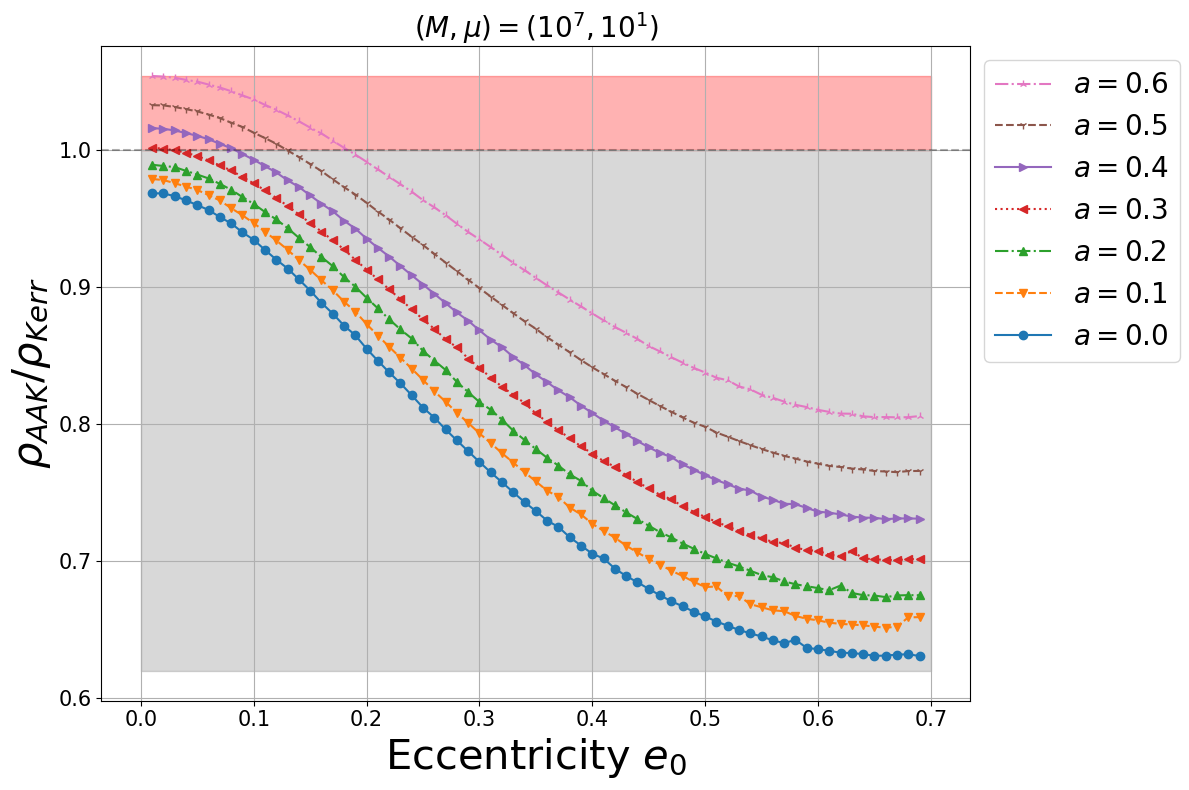

In [32]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each dataset with a unique linestyle and marker
plt.fill_between(np.linspace(0, 0.7, 500), 0.62, 1, color='grey', alpha=0.3)
plt.fill_between(np.linspace(0, 0.7, 500), 1, np.max(df_M_1e7_mu_10_a_0p6['SNR_ratio']), color='red', alpha=0.3)


plt.plot(df_M_1e7_mu_10_a_0p0['e'], df_M_1e7_mu_10_a_0p0['SNR_ratio'], label=r'$a = 0.0$', linestyle='-', marker='o')
plt.plot(df_M_1e7_mu_10_a_0p1['e'], df_M_1e7_mu_10_a_0p1['SNR_ratio'], label=r'$a = 0.1$', linestyle='--', marker='v')
plt.plot(df_M_1e7_mu_10_a_0p2['e'], df_M_1e7_mu_10_a_0p2['SNR_ratio'], label=r'$a = 0.2$', linestyle='-.', marker='^')
plt.plot(df_M_1e7_mu_10_a_0p3['e'], df_M_1e7_mu_10_a_0p3['SNR_ratio'], label=r'$a = 0.3$', linestyle=':', marker='<')
plt.plot(df_M_1e7_mu_10_a_0p4['e'], df_M_1e7_mu_10_a_0p4['SNR_ratio'], label=r'$a = 0.4$', linestyle='-', marker='>')
plt.plot(df_M_1e7_mu_10_a_0p5['e'], df_M_1e7_mu_10_a_0p5['SNR_ratio'], label=r'$a = 0.5$', linestyle='--', marker='1')
plt.plot(df_M_1e7_mu_10_a_0p6['e'], df_M_1e7_mu_10_a_0p6['SNR_ratio'], label=r'$a = 0.6$', linestyle='-.', marker='2')

# Adding a horizontal line at y = 1.0
plt.axhline(y=1.0, color='black', linestyle='dashed', alpha=0.3)

# Adding text to shaded regions
# plt.text(0.15, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
# plt.text(0.15, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

# plt.text(0.17, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
# plt.text(0.17, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

# Labels and Title
plt.xlabel(r'Eccentricity $e_{0}$', fontsize=30)
plt.ylabel(r'$\rho_{AAK} / \rho_{Kerr}$', fontsize=30)
plt.title(r'$(M, \mu) = (10^{7}, 10^{1})$', fontsize=20)

# Tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Grid
plt.grid(True)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))


# Layout adjustment
plt.tight_layout()
# plt.savefig("../../../PE/Plots/Kerr_AAK_amplitude_comparison_SNR_M_1e6_mu_1e1.pdf", bbox_inches="tight")
plt.show()

In [25]:
df_M_1e7_mu_100 = pd.read_csv("diff_amps_same_traj_M_1e7_mu_100.csv")

df_M_1e7_mu_100_a_0p0 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.0]
df_M_1e7_mu_100_a_0p1 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.1]
df_M_1e7_mu_100_a_0p2 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.2]
df_M_1e7_mu_100_a_0p3 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.3]
df_M_1e7_mu_100_a_0p4 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.4]
df_M_1e7_mu_100_a_0p5 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.5]
df_M_1e7_mu_100_a_0p6 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.6000000000000001]
df_M_1e7_mu_100_a_0p7 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.7000000000000001]
df_M_1e7_mu_100_a_0p8 = df_M_1e7_mu_100[df_M_1e7_mu_100['a'] == 0.8]

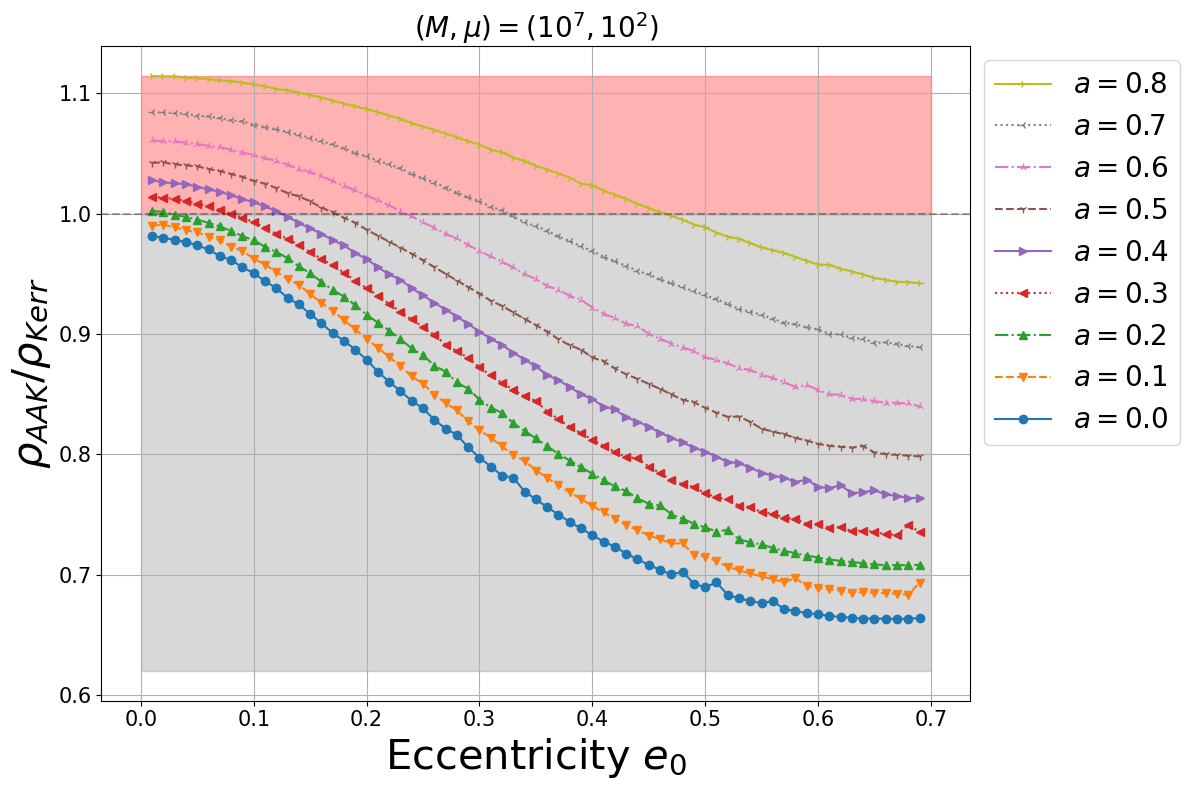

In [26]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each dataset with a unique linestyle and marker
plt.fill_between(np.linspace(0, 0.7, 500), 0.62, 1, color='grey', alpha=0.3)
plt.fill_between(np.linspace(0, 0.7, 500), 1, np.max(df_M_1e7_mu_100_a_0p8['SNR_ratio']), color='red', alpha=0.3)


plt.plot(df_M_1e7_mu_100_a_0p0['e'], df_M_1e7_mu_100_a_0p0['SNR_ratio'], label=r'$a = 0.0$', linestyle='-', marker='o')
plt.plot(df_M_1e7_mu_100_a_0p1['e'], df_M_1e7_mu_100_a_0p1['SNR_ratio'], label=r'$a = 0.1$', linestyle='--', marker='v')
plt.plot(df_M_1e7_mu_100_a_0p2['e'], df_M_1e7_mu_100_a_0p2['SNR_ratio'], label=r'$a = 0.2$', linestyle='-.', marker='^')
plt.plot(df_M_1e7_mu_100_a_0p3['e'], df_M_1e7_mu_100_a_0p3['SNR_ratio'], label=r'$a = 0.3$', linestyle=':', marker='<')
plt.plot(df_M_1e7_mu_100_a_0p4['e'], df_M_1e7_mu_100_a_0p4['SNR_ratio'], label=r'$a = 0.4$', linestyle='-', marker='>')
plt.plot(df_M_1e7_mu_100_a_0p5['e'], df_M_1e7_mu_100_a_0p5['SNR_ratio'], label=r'$a = 0.5$', linestyle='--', marker='1')
plt.plot(df_M_1e7_mu_100_a_0p6['e'], df_M_1e7_mu_100_a_0p6['SNR_ratio'], label=r'$a = 0.6$', linestyle='-.', marker='2')

plt.plot(df_M_1e7_mu_100_a_0p7['e'], df_M_1e7_mu_100_a_0p7['SNR_ratio'], label=r'$a = 0.7$', linestyle=':', marker='3')
plt.plot(df_M_1e7_mu_100_a_0p8['e'], df_M_1e7_mu_100_a_0p8['SNR_ratio'], label=r'$a = 0.8$', linestyle='-', marker='4')

# Adding a horizontal line at y = 1.0
plt.axhline(y=1.0, color='black', linestyle='dashed', alpha=0.3)

# Adding text to shaded regions
# plt.text(0.15, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
# plt.text(0.15, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

# plt.text(0.17, 0.77, r"$\bf{AAK\ underestimates\ SNR}$", color='grey', fontsize=17, ha='center')
# plt.text(0.17, 1.23, r"$\bf{AAK\ overestimates\ SNR}$", color='red', fontsize=17, ha='center')

# Labels and Title
plt.xlabel(r'Eccentricity $e_{0}$', fontsize=30)
plt.ylabel(r'$\rho_{AAK} / \rho_{Kerr}$', fontsize=30)
plt.title(r'$(M, \mu) = (10^{7}, 10^{2})$', fontsize=20)

# Tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Grid
plt.grid(True)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))


# Layout adjustment
plt.tight_layout()
# plt.savefig("../../../PE/Plots/Kerr_AAK_amplitude_comparison_SNR_M_1e6_mu_1e1.pdf", bbox_inches="tight")
plt.show()

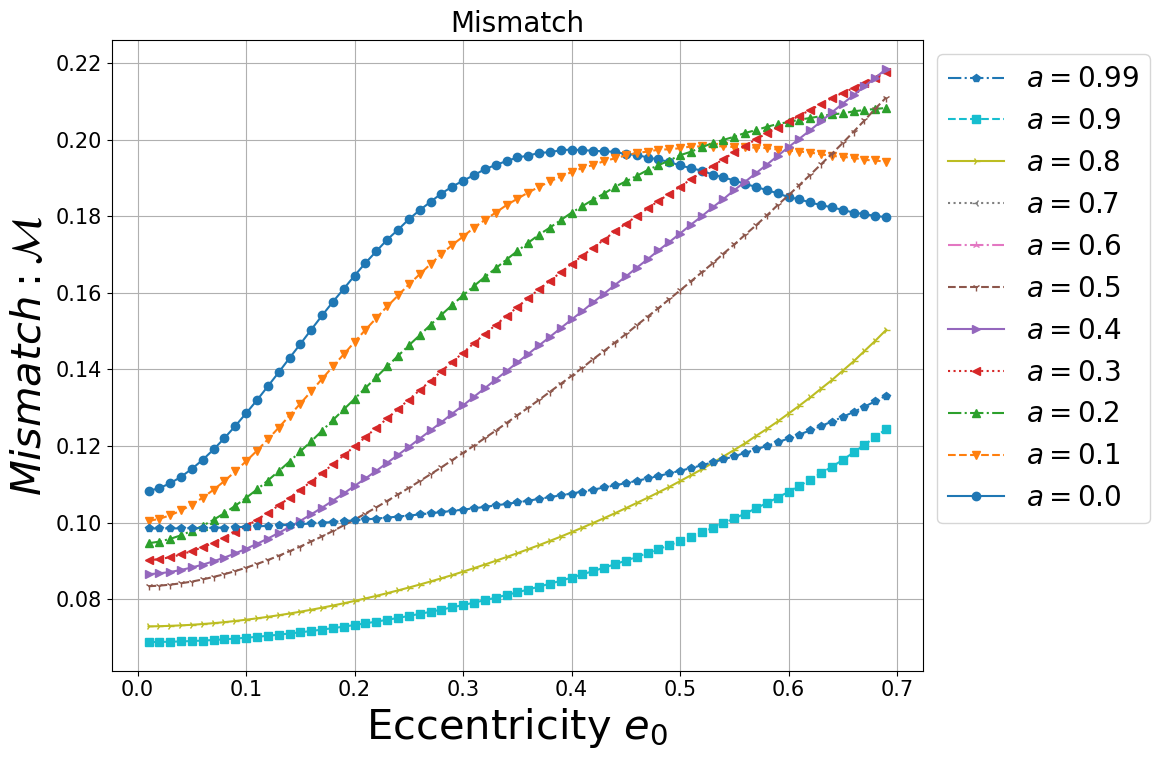

In [106]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 8))


plt.plot(df_a_0['e'], df_a_0['mismatch'], label=r'$a = 0.0$', linestyle='-', marker='o')
plt.plot(df_a_0p1['e'], df_a_0p1['mismatch'], label=r'$a = 0.1$', linestyle='--', marker='v')
plt.plot(df_a_0p2['e'], df_a_0p2['mismatch'], label=r'$a = 0.2$', linestyle='-.', marker='^')
plt.plot(df_a_0p3['e'], df_a_0p3['mismatch'], label=r'$a = 0.3$', linestyle=':', marker='<')
plt.plot(df_a_0p4['e'], df_a_0p4['mismatch'], label=r'$a = 0.4$', linestyle='-', marker='>')
plt.plot(df_a_0p5['e'], df_a_0p5['mismatch'], label=r'$a = 0.5$', linestyle='--', marker='1')
plt.plot(df_a_0p6['e'], df_a_0p6['mismatch'], label=r'$a = 0.6$', linestyle='-.', marker='2')
plt.plot(df_a_0p7['e'], df_a_0p7['mismatch'], label=r'$a = 0.7$', linestyle=':', marker='3')
plt.plot(df_a_0p8['e'], df_a_0p8['mismatch'], label=r'$a = 0.8$', linestyle='-', marker='4')
plt.plot(df_a_0p9['e'], df_a_0p9['mismatch'], label=r'$a = 0.9$', linestyle='--', marker='s')
plt.plot(df_a_0p99['e'], df_a_0p99['mismatch'], label=r'$a = 0.99$', linestyle='-.', marker='p')

# Labels and Title
plt.xlabel(r'Eccentricity $e_{0}$', fontsize=30)
plt.ylabel(r'$Mismatch: \mathcal{M}$', fontsize=30)
plt.title(r'Mismatch', fontsize=20)

# Tick labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Grid
plt.grid(True)

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=20, loc='upper left', bbox_to_anchor=(1, 1))


# Layout adjustment
plt.tight_layout()
# plt.savefig("../../../PE/Plots/Kerr_AAK_amplitude_comparison_SNR_M_1e6_mu_1e1.pdf", bbox_inches="tight")
plt.show()



In [17]:
df_diff_amps_diff_traj = pd.read_csv("diff_amps_diff_traj_M_1e6_mu_1e1.csv")
a0 = 1e-2
df_diff_amps_diff_traj_a_0p01 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == a0]
df_diff_amps_diff_traj_a_0p11 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.11]
df_diff_amps_diff_traj_a_0p21 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.21]
df_diff_amps_diff_traj_a_0p31 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.31]
df_diff_amps_diff_traj_a_0p41 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.41]
df_diff_amps_diff_traj_a_0p51 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.51]
df_diff_amps_diff_traj_a_0p61 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.6100000000000001]
df_diff_amps_diff_traj_a_0p71 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.7100000000000001]
df_diff_amps_diff_traj_a_0p81 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.8100000000000001]

# df_diff_amps_diff_traj_a_0p71 = df_diff_amps_diff_traj[df_diff_amps_diff_traj['a'] == 0.71]

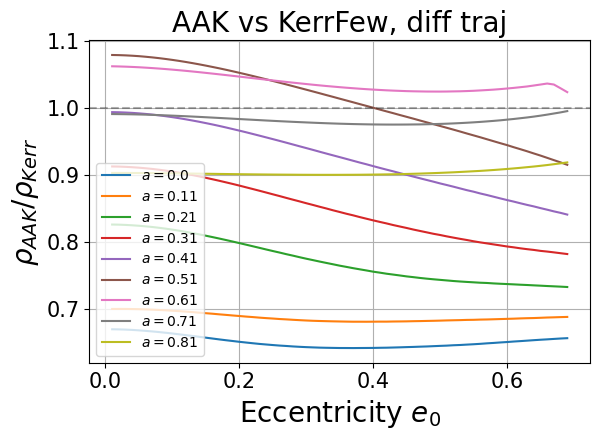

In [19]:

plt.plot(df_diff_amps_diff_traj_a_0p01['e'], df_diff_amps_diff_traj_a_0p01['SNR_ratio'], label=r'$a = 0.0$')
plt.plot(df_diff_amps_diff_traj_a_0p11['e'], df_diff_amps_diff_traj_a_0p11['SNR_ratio'], label=r'$a = 0.11$')
plt.plot(df_diff_amps_diff_traj_a_0p21['e'], df_diff_amps_diff_traj_a_0p21['SNR_ratio'], label=r'$a = 0.21$')
plt.plot(df_diff_amps_diff_traj_a_0p31['e'], df_diff_amps_diff_traj_a_0p31['SNR_ratio'], label=r'$a = 0.31$')
plt.plot(df_diff_amps_diff_traj_a_0p41['e'], df_diff_amps_diff_traj_a_0p41['SNR_ratio'], label=r'$a = 0.41$')
plt.plot(df_diff_amps_diff_traj_a_0p51['e'], df_diff_amps_diff_traj_a_0p51['SNR_ratio'], label=r'$a = 0.51$')
plt.plot(df_diff_amps_diff_traj_a_0p61['e'], df_diff_amps_diff_traj_a_0p61['SNR_ratio'], label=r'$a = 0.61$')
plt.plot(df_diff_amps_diff_traj_a_0p71['e'], df_diff_amps_diff_traj_a_0p71['SNR_ratio'], label=r'$a = 0.71$')
plt.plot(df_diff_amps_diff_traj_a_0p81['e'], df_diff_amps_diff_traj_a_0p81['SNR_ratio'], label=r'$a = 0.81$')
# plt.plot(df_a_0p3['e'], df_a_0p3['SNR_ratio'], label=r'$a = 0.3$')
# plt.plot(df_a_0p4['e'], df_a_0p4['SNR_ratio'], label=r'$a = 0.4$')
# plt.plot(df_a_0p5['e'], df_a_0p5['SNR_ratio'], label=r'$a = 0.5$')
# plt.plot(df_a_0p6['e'], df_a_0p6['SNR_ratio'], label=r'$a = 0.6$')
# plt.plot(df_a_0p7['e'], df_a_0p7['SNR_ratio'], label=r'$a = 0.7$')
# plt.plot(df_a_0p8['e'], df_a_0p8['SNR_ratio'], label=r'$a = 0.8$')
plt.axhline(y = 1.0, c = 'black', linestyle = 'dashed', alpha = 0.3)
plt.xlabel(r'Eccentricity $e_{0}$',fontsize = 20)
plt.ylabel(r'$\rho_{AAK} / \rho_{Kerr}$', fontsize = 20)
plt.title(r'AAK vs KerrFew, diff traj', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid()
plt.legend(fontsize = 10)
plt.tight_layout()

In [20]:
import pandas as pd

df_same_amps_diff_traj = pd.read_csv("same_kerr_amps_diff_traj_M_1e6_mu_1e1.csv")

In [21]:
df_same_amps_diff_traj

a     e    SNR_Kerr  SNR_ratio  mismatch
0     0.01  0.01   59.637569   0.707619  0.999450
1     0.01  0.02   59.562462   0.708727  0.999022
2     0.01  0.03   59.539481   0.710249  0.998957
3     0.01  0.04   59.567721   0.712520  0.999830
4     0.01  0.05   59.645767   0.715105  0.998546
...    ...   ...         ...        ...       ...
1306  0.91  0.65  172.633188   0.735041  0.998044
1307  0.91  0.66  172.245904   0.735035  0.999135
1308  0.91  0.67  171.832567   0.734987  0.999450
1309  0.91  0.68  171.390993   0.734911  0.999754
1310  0.91  0.69  170.917963   0.734808  0.999982

[1311 rows x 5 columns]

In [22]:
a0 = 1e-2
df_same_amps_diff_traj_a_0p01 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == a0]
df_same_amps_diff_traj_a_0p11 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.11]
df_same_amps_diff_traj_a_0p21 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.21]
df_same_amps_diff_traj_a_0p31 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.31]
df_same_amps_diff_traj_a_0p41 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.41]
df_same_amps_diff_traj_a_0p51 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.51]
df_same_amps_diff_traj_a_0p61 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] ==  0.6100000000000001]
df_same_amps_diff_traj_a_0p71 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.7100000000000001]
df_same_amps_diff_traj_a_0p81 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.8100000000000001]
df_same_amps_diff_traj_a_0p91 = df_same_amps_diff_traj[df_same_amps_diff_traj['a'] == 0.91]

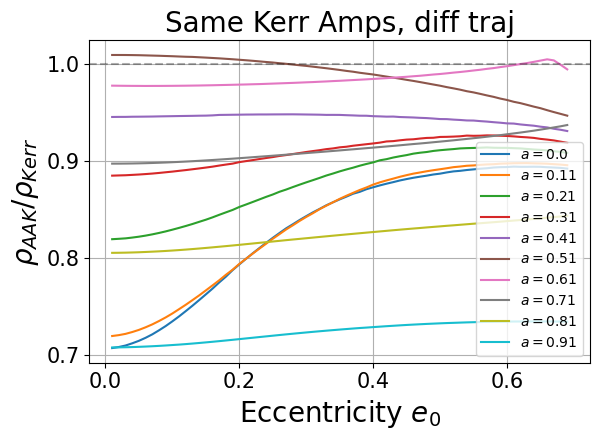

In [24]:
plt.plot(df_same_amps_diff_traj_a_0p01['e'], df_same_amps_diff_traj_a_0p01['SNR_ratio'], label=r'$a = 0.0$')
plt.plot(df_same_amps_diff_traj_a_0p11['e'], df_same_amps_diff_traj_a_0p11['SNR_ratio'], label=r'$a = 0.11$')
plt.plot(df_same_amps_diff_traj_a_0p21['e'], df_same_amps_diff_traj_a_0p21['SNR_ratio'], label=r'$a = 0.21$')
plt.plot(df_same_amps_diff_traj_a_0p31['e'], df_same_amps_diff_traj_a_0p31['SNR_ratio'], label=r'$a = 0.31$')
plt.plot(df_same_amps_diff_traj_a_0p41['e'], df_same_amps_diff_traj_a_0p41['SNR_ratio'], label=r'$a = 0.41$')
plt.plot(df_same_amps_diff_traj_a_0p51['e'], df_same_amps_diff_traj_a_0p51['SNR_ratio'], label=r'$a = 0.51$')
plt.plot(df_same_amps_diff_traj_a_0p61['e'], df_same_amps_diff_traj_a_0p61['SNR_ratio'], label=r'$a = 0.61$')
plt.plot(df_same_amps_diff_traj_a_0p71['e'], df_same_amps_diff_traj_a_0p71['SNR_ratio'], label=r'$a = 0.71$')
plt.plot(df_same_amps_diff_traj_a_0p81['e'], df_same_amps_diff_traj_a_0p81['SNR_ratio'], label=r'$a = 0.81$')
plt.plot(df_same_amps_diff_traj_a_0p91['e'], df_same_amps_diff_traj_a_0p91['SNR_ratio'], label=r'$a = 0.91$')


plt.axhline(y = 1.0, c = 'black', linestyle = 'dashed', alpha = 0.3)
plt.xlabel(r'Eccentricity $e_{0}$',fontsize = 20)
plt.ylabel(r'$\rho_{AAK} / \rho_{Kerr}$', fontsize = 20)
plt.title(r'Same Kerr Amps, diff traj', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid()
plt.legend(fontsize = 10)
plt.tight_layout()
